<a href="https://colab.research.google.com/github/thutrieu123/MachineLearning/blob/main/Lab_7_20130422_TrieuAnhThu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [25]:
# code
# code
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.cluster import completeness_score
from scipy.stats import mode
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import AgglomerativeClustering
from prettytable import PrettyTable
import scipy.cluster.hierarchy as shc

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/ML/Lab7'

Mounted at /content/gdrive
/content/gdrive/MyDrive/ML/Lab7


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [3]:
#code
iris = datasets.load_iris(as_frame=True)
X = iris['data']
y = iris['target']
# print(X)
# print(y)
# x1_train, x1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.3, train_size= 0.7,random_state = 1)

Building model using cross_validate


In [10]:
svm_ln = svm.SVC(kernel='sigmoid', random_state=0)
scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
scores = cross_validate(svm_ln, X, y, scoring=scoring,cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_accuracy']))
print(np.mean(scores['test_precision_macro']))
print(np.mean(scores['test_recall_macro']))
print(np.mean(scores['test_f1_macro']))

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Pr

['fit_time', 'score_time', 'test_accuracy', 'test_f1_macro', 'test_precision_macro', 'test_recall_macro']
0.06666666666666668
0.030789950789950792
0.06666666666666667
0.041984126984126985


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Building model using cross_val_score

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)
model = svm.SVC(kernel='rbf', random_state=0)
scores = cross_val_score(model, X, y, scoring='accuracy',cv=cv)
print(scores.mean())

0.96


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [13]:
rfc=RandomForestClassifier(n_estimators=100)
#Train the model using the training sets
rfc.fit(X,y)
# feature_imp = pd.Series(rfc.feature_importances_,iris =iris.feature_names).sort_values(ascending=False)
feature_imp = pd.Series(rfc.feature_importances_, index =iris.feature_names).sort_values(ascending=False)
features = feature_imp.index[0:5].values
X_new = X[feature_imp.index[0:5]]
X_new

scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
scores = cross_validate(rfc,X_new,y,scoring=scoring,cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_accuracy']))
print(np.mean(scores['test_precision_macro']))
print(np.mean(scores['test_recall_macro']))
print(np.mean(scores['test_f1_macro']))

['fit_time', 'score_time', 'test_accuracy', 'test_f1_macro', 'test_precision_macro', 'test_recall_macro']
0.96
0.9644444444444445
0.96
0.9597306397306398


In [ ]:
scores = cross_validate(rfc, X_new, y, scoring='accuracy',cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.96


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [41]:
mnist = datasets.load_digits(as_frame=True)
X = mnist['data']
y = mnist['target']

In [33]:
kmeans = KMeans(n_clusters = 10, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
kmeans.fit(X)
clusters = kmeans.predict(mnist.data)
kmeans.cluster_centers_.shape

clusters = kmeans.predict(mnist.data)
print(accuracy_score(mnist.target,clusters))
print(completeness_score(y, clusters))

0.06956037840845854
0.744573094526152


Get SSE

In [34]:
labels = np.zeros_like(clusters)
print(labels)
for i in range(10):
  print(i, '------------------------------')
  mask = (clusters == i)
  print(mask)
  labels[mask] = mode(y[mask])[0]
  print(labels) 
accuracy_km = round(accuracy_score(y, labels))
precision_km = round(precision_score(y, labels, average='macro'),4)
recall_km = round(recall_score(y, labels, average='macro'),4)
f1_km = round(f1_score(y, labels, average='macro'),4)

[0 0 0 ... 0 0 0]
0 ------------------------------
[False False False ... False False False]
[0 0 0 ... 0 0 0]
1 ------------------------------
[ True False False ... False False False]
[0 0 0 ... 0 0 0]
2 ------------------------------
[False False False ... False False False]
[0 0 0 ... 0 0 0]
3 ------------------------------
[False False False ... False  True  True]
[0 0 0 ... 0 9 9]
4 ------------------------------
[False False False ... False False False]
[0 0 0 ... 0 9 9]
5 ------------------------------
[False False False ... False False False]
[0 0 0 ... 0 9 9]
6 ------------------------------
[False False False ... False False False]
[0 0 0 ... 0 9 9]
7 ------------------------------
[False False False ... False False False]
[0 0 0 ... 0 9 9]
8 ------------------------------
[False  True  True ...  True False False]
[0 8 8 ... 8 9 9]
9 ------------------------------
[False False False ... False False False]
[0 8 8 ... 8 9 9]


<ipython-input-34-6e26cc76caa3>:7: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(y[mask])[0]


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [42]:
# code
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X,y)

feature_imp = pd.Series(clf.feature_importances_,index=mnist.feature_names).sort_values(ascending=False)

features = feature_imp.index[0:5].values
X_new = X[feature_imp.index[0:5]]

scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
scores = cross_validate(clf,X_new,y,scoring=scoring,cv=10)

accuracy_rf = round(np.mean(scores['test_accuracy']),4)
precision_rf = round(np.mean(scores['test_precision_macro']),4)
recall_rf = round(np.mean(scores['test_recall_macro']),4)
f1_rf = round(np.mean(scores['test_f1_macro']),4)

In [43]:
#kNN
kNN = KNeighborsClassifier(n_neighbors = 10)
kNN.fit(X, y)
scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
scores = cross_validate(kNN,X,y,scoring=scoring,cv=10)

accuracy_kNN = round(np.mean(scores['test_accuracy']),4)
precision_kNN = round(np.mean(scores['test_precision_macro']),4)
recall_kNN = round(np.mean(scores['test_recall_macro']),4)
f1_kNN = round(np.mean(scores['test_f1_macro']),4)

In [44]:
#Naïve Bayes
nb = GaussianNB()
nb.fit(X,y)
scoring = ['accuracy','precision_macro','recall_macro','f1_macro']
scores = cross_validate(nb,X,y,scoring=scoring,cv=10)

accuracy_nb = round(np.mean(scores['test_accuracy']),4)
precision_nb = round(np.mean(scores['test_precision_macro']),4)
recall_nb = round(np.mean(scores['test_recall_macro']),4)
f1_nb = round(np.mean(scores['test_f1_macro']),4)

In [45]:
table = PrettyTable(["","Accuracy", "Precision", "Recall", "F1"])
table.add_row(["Kmneans  ",accuracy_km, precision_km, recall_km, f1_km])
table.add_row(["Random Forest  ",accuracy_rf, precision_rf, recall_rf, f1_rf])
table.add_row(["KNN  ",accuracy_kNN, precision_kNN, recall_kNN, f1_kNN])
table.add_row(["NaiveBayes   ",accuracy_nb, precision_nb, recall_nb, f1_nb])
print(table)

+-----------------+----------+-----------+--------+--------+
|                 | Accuracy | Precision | Recall |   F1   |
+-----------------+----------+-----------+--------+--------+
|    Kmneans      |    1     |   0.8003  | 0.7919 | 0.7881 |
| Random Forest   |  0.7179  |   0.7249  | 0.7183 | 0.7123 |
|      KNN        |  0.9622  |   0.9658  | 0.962  | 0.9618 |
|  NaiveBayes     |  0.8114  |   0.8481  | 0.8114 | 0.809  |
+-----------------+----------+-----------+--------+--------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [47]:
#code
print('Unsupervised learning')

Unsupervised learning


2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


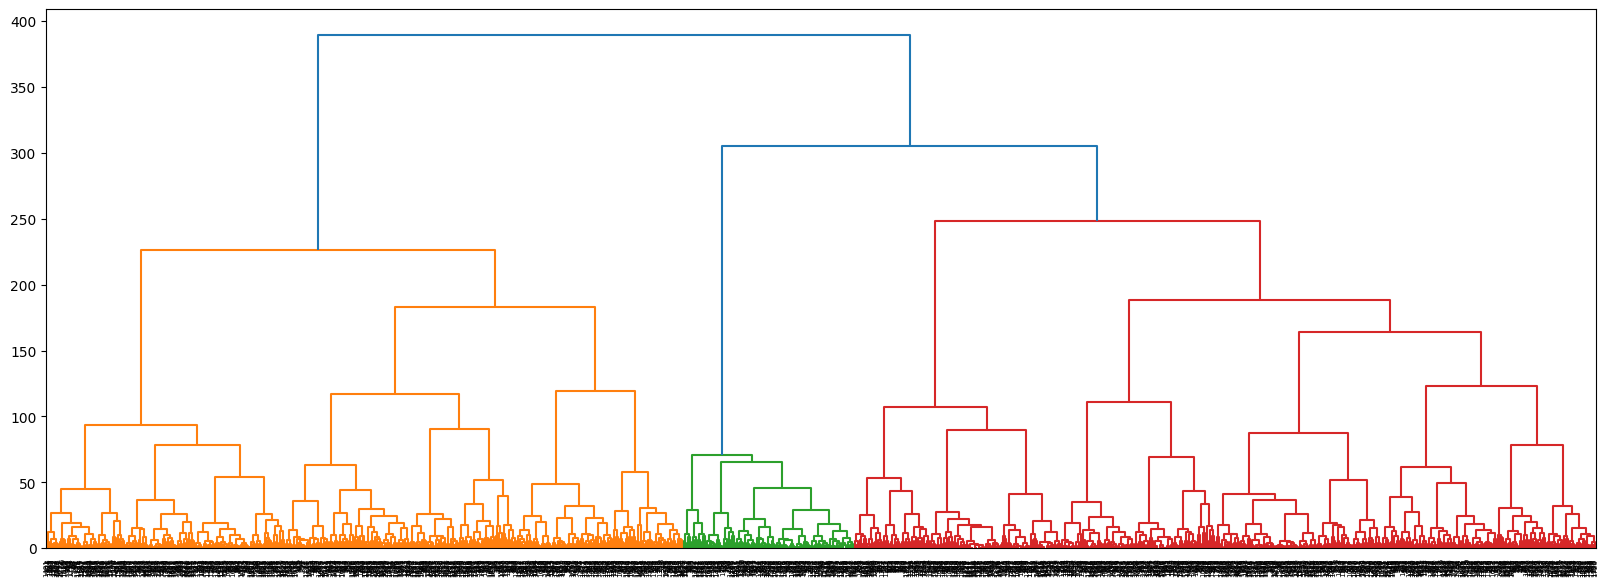

In [49]:
cluster = AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
cluster.fit_predict(X_new)

plt.figure(figsize=(20, 7))
dend = shc.dendrogram(shc.linkage(X_new.iloc[:, 0:6], method='ward'))

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [67]:
#code
data = pd.read_csv('shopping-data.csv')
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

     Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]


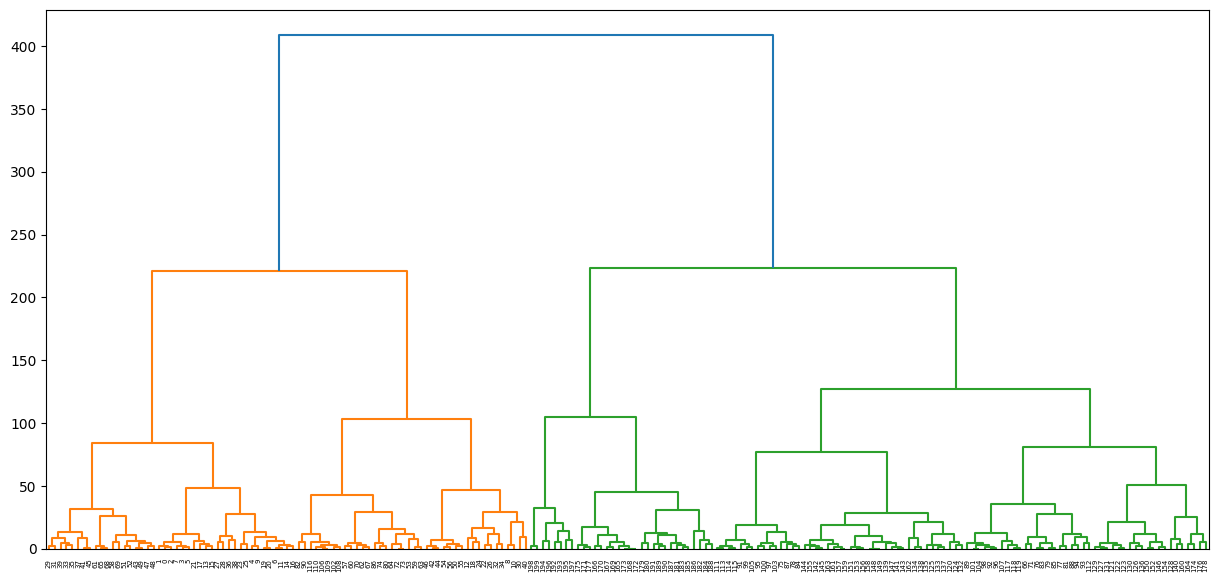

In [69]:
data.drop(['CustomerID','Genre'], axis='columns',inplace=True)
print(data)
plt.figure(figsize=(15, 7))
dend = shc.dendrogram(shc.linkage(data[['Age', 'Annual Income (k$)']], method='ward'))

*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

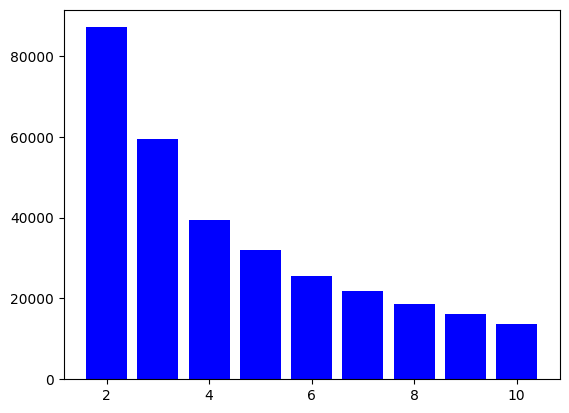

In [61]:
#code
sse = []
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, random_state = 0)
  kmeans.fit(data[['Age', 'Annual Income (k$)']])
  sse.append(kmeans.inertia_)
plt.bar(range(2,11),sse,color='blue')
plt.show() 

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [62]:
#code
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(data[['Age', 'Annual Income (k$)']])

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

#Finally,
Save a copy in your Github. Remember renaming the notebook.